<a href="https://colab.research.google.com/github/VarnaNemulla/Assignment-7/blob/main/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Default title text
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils
#from keras import backend as K
#K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# convert from int to float and normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# transpose the dimensions of the input data
X_train = np.transpose(X_train, (0, 3, 1, 2))
X_test = np.transpose(X_test, (0, 3, 1, 2))

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

170498071/170498071 [==============================] - 13s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 3, 32, 32)         9248      
                                                                 
 dropout (Dropout)           (None, 3, 32, 32)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 32, 32)         9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 16, 32)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)              

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


None
Epoch 1/25
1563/1563 [==============================] - 17s 5ms/step - loss: 1.8291 - accuracy: 0.3409 - val_loss: 1.5947 - val_accuracy: 0.4344
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5814 - accuracy: 0.4350 - val_loss: 1.4396 - val_accuracy: 0.4858
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4729 - accuracy: 0.4699 - val_loss: 1.3598 - val_accuracy: 0.5075
Epoch 4/25
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4091 - accuracy: 0.4922 - val_loss: 1.3238 - val_accuracy: 0.5249
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3643 - accuracy: 0.5102 - val_loss: 1.2796 - val_accuracy: 0.5377
Epoch 6/25
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3346 - accuracy: 0.5186 - val_loss: 1.2710 - val_accuracy: 0.5399
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3032 - accuracy: 0.5319 - val_loss: 1.2355 - val_acc

In [2]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils
# from keras import backend as K
# K.tensorflow_backend.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# convert from int to float and normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# transpose the dimensions of the input data
X_train = np.transpose(X_train, (0, 3, 1, 2))
X_test = np.transpose(X_test, (0, 3, 1, 2))

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(1, 1)))  
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 3, 32, 32)         9248      
                                                                 
 dropout_2 (Dropout)         (None, 3, 32, 32)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 32, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 16, 32)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 16, 64)         18496     
                                                                 
 dropout_3 (Dropout)         (None, 1, 16, 64)         0         
                                                      

In [3]:
predictions = model.predict(X_test[:4])
print(predictions)
print(np.argmax(predictions, axis=1))
print(y_test[:4])

1/1 [==============================] - 0s 277ms/step
[[2.22511571e-02 1.31829968e-02 1.49813980e-01 4.61629719e-01
  7.05029815e-02 1.74670145e-01 5.90404160e-02 2.38896627e-02
  1.57560539e-02 9.26285330e-03]
 [6.61226641e-03 1.30530177e-02 6.57487317e-06 2.69160432e-06
  3.72246723e-06 1.23481800e-06 1.23588052e-06 7.47649722e-07
  9.79308307e-01 1.01017463e-03]
 [2.36700252e-01 8.80614016e-03 1.18412236e-02 1.61603326e-03
  7.78272795e-03 2.27830070e-03 1.31363035e-04 1.40580805e-02
  7.06156373e-01 1.06294882e-02]
 [7.35657096e-01 4.87595834e-02 3.18442769e-02 4.64400696e-03
  1.03830583e-02 1.21090026e-03 1.08779997e-04 1.30635753e-01
  2.20719222e-02 1.46845728e-02]]
[3 8 8 0]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


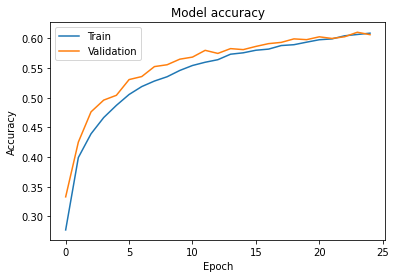

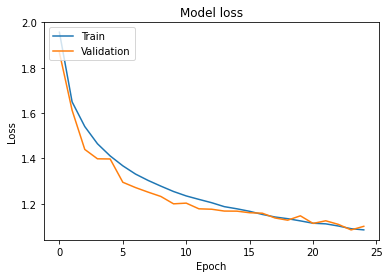

In [4]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()